In [34]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import pandas as pd
import seaborn as sns

In [35]:
rank = 200
S1 = np.random.randn(rank, 2)
S1[:,1] = S1[:,0] + S1[:,1]
S1 = S1 + np.array([2, -1])
S2 = np.random.randn(rank, 2)
S2[:,1] = S2[:,0] + S2[:,1]

In [36]:
data = np.vstack((S1, S2))
labels  = np.append(np.zeros(rank),np.ones(rank))
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [37]:
# between-class covariance
cmc1 = np.mean(S1, axis=0)
cmc2 = np.mean(S2, axis=0)
covB = np.cov(np.vstack((cmc1,cmc2)).T,ddof=1)

In [38]:
# within-class covariances
cov1 = np.cov(S1.T, ddof=1)
cov2 = np.cov(S2.T, ddof=1)
covW = (cov1 + cov2) / 2

In [39]:
from scipy.linalg import eigh
L, V = eigh(covB, covW)


In [40]:
sidx  = np.argsort(L)[::-1]
evals = L[sidx]
evecs = V[:,sidx]

In [41]:
projA = (data-np.mean(data,axis=0)) @ evecs

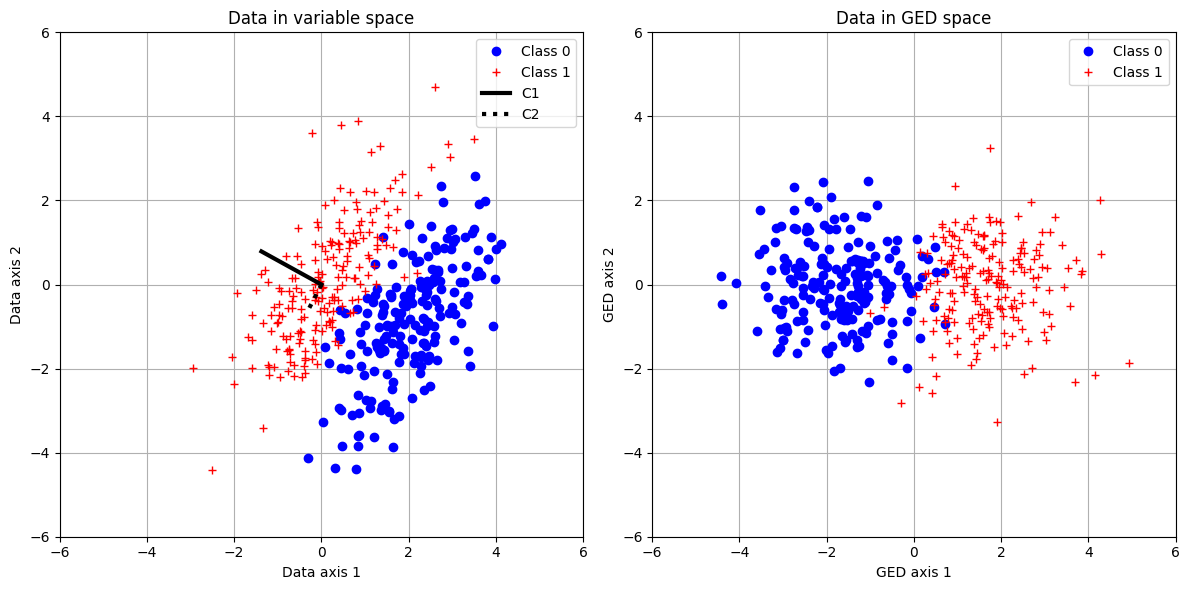

In [42]:
_,axs = plt.subplots(1,2,figsize=(12,6))
marker = ['bo','r+']
for i in range(2):
  axs[0].plot(data[labels==i,0],data[labels==i,1],marker[i],label=f'Class {i}')

axs[0].plot([0,evecs[0,0]],[0,evecs[1,0]],'k-',linewidth=3,label='C1')
axs[0].plot([0,evecs[0,1]],[0,evecs[1,1]],'k:',linewidth=3,label='C2')
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].set_title('Data in variable space')



# and again in the GED space
for i in range(2):
  axs[1].plot(projA[labels==i,0],projA[labels==i,1],marker[i],label=f'Class {i}')
axs[1].set_xlabel('GED axis 1')
axs[1].set_ylabel('GED axis 2')
axs[1].set_title('Data in GED space')


# common settings
for i in range(2):
  axs[i].axis([-6,6,-6,6])
  axs[i].grid()
  axs[i].legend()

plt.tight_layout()

Prediction accuracy: 96.5%


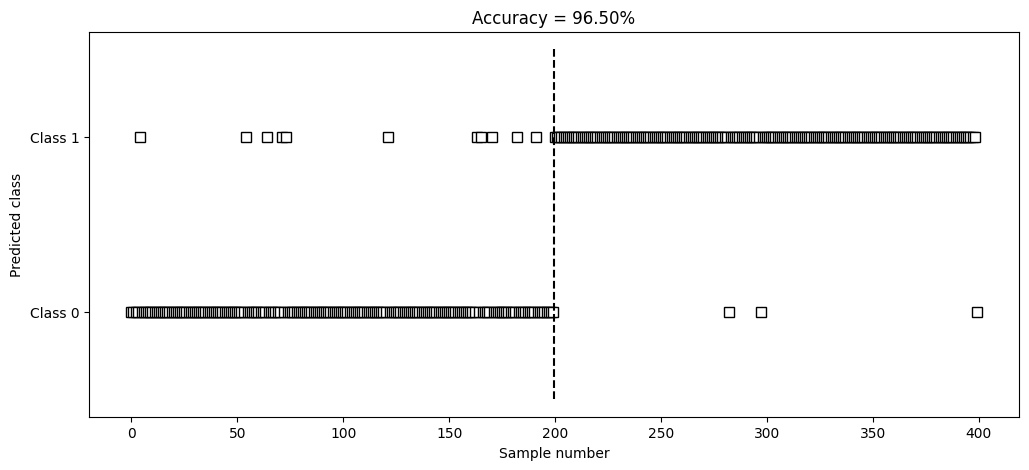

In [43]:
# prediction (converted to ints)
predictedLabel = ( projA[:,0] > 0 )+0

print(f'Prediction accuracy: {100*np.mean( predictedLabel==labels )}%')

# show the results
plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2)
plt.plot([rank-.5,rank-.5],[-.5,1.5],'k--')
plt.xlabel('Sample number')
plt.ylabel('Predicted class')
plt.yticks([0,1],labels=['Class 0','Class 1'])
plt.title(f'Accuracy = {100*np.mean(predictedLabel==labels):.2f}%')
plt.savefig('Figure_15_06c.png',dpi=300)
plt.show()

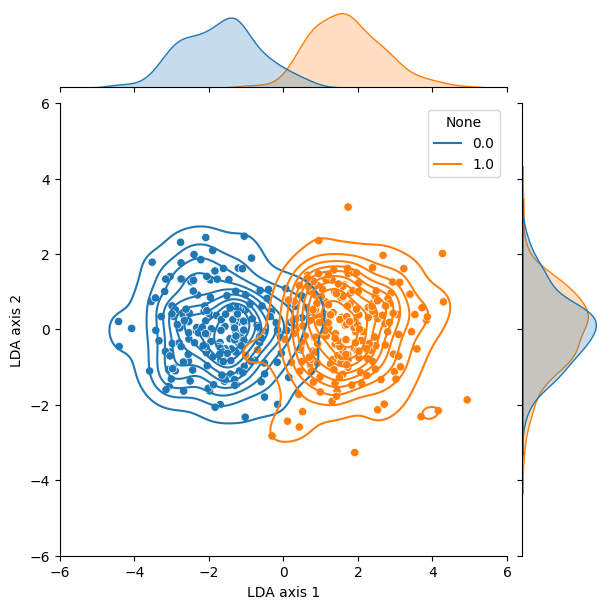

In [44]:
ax = sns.jointplot(x=projA[:,0],y=projA[:,1],hue=labels,xlim=[-6,6],ylim=[-6,6])
ax.ax_joint.set_xlabel('LDA axis 1')
ax.ax_joint.set_ylabel('LDA axis 2')
ax.plot_joint(sns.kdeplot)

Exercise #7

In [45]:
# not the identity matrix!
print("V'V:")
print(np.round( evecs.T @ evecs ,3))


# yes the identity matrix!
print(f"\nV'RV:")
print(np.round( evecs.T @ covW @ evecs ,3))

V'V:
[[ 2.513 -0.056]
 [-0.056  0.388]]

V'RV:
[[1. 0.]
 [0. 1.]]


Exersize #8

Text(0.5, 1.0, 'Accuracy = 96.50%')

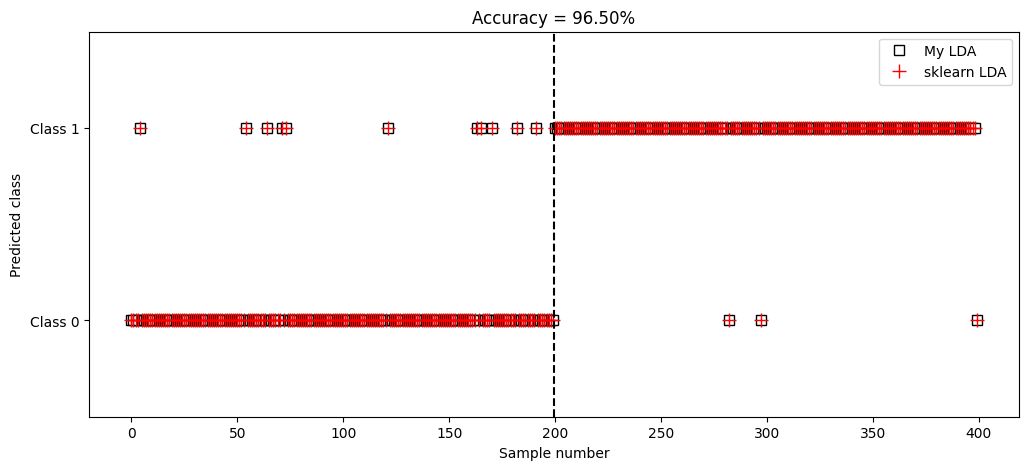

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

ldamodel = LDA(solver='eigen')
ldamodel.fit(data,labels)


# show the results
plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2,label='My LDA')
plt.plot(ldamodel.predict(data),'r+',markersize=10,markerfacecolor='w',linewidth=2,label='sklearn LDA')
plt.plot([rank-.5,rank-.5],[-.5,1.5],'k--')
plt.xlabel('Sample number')
plt.ylabel('Predicted class')
plt.yticks([0,1],labels=['Class 0','Class 1'])
plt.ylim([-.5,1.5])
plt.legend()
plt.title(f'Accuracy = {100*np.mean(ldamodel.predict(data)==labels):.2f}%')

Exercise #9

In [47]:
shrinkage = np.linspace(0,1,21)
accuracies = np.zeros(len(shrinkage))
shrinkage

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [48]:
# loop over shrinkages and compute model accuracy
for i,s in enumerate(shrinkage):
  
  # setup the model
  ldamodel = LDA(solver='eigen',shrinkage=s)

  tmpacc = []
  for _ in range(50):

    # randomly split the data into train/test
    randorder = np.random.permutation(data.shape[0])

    # fit the model on the training data
    ldamodel.fit(data[randorder[:350],:],labels[randorder[:350]])

    # grab accuracy
    tmpacc.append(100*np.mean(ldamodel.predict(data[randorder[350:],:])==labels[randorder[350:]]))

  # evaluate model performance on the test data
  accuracies[i] = np.mean(tmpacc)

Text(0.5, 1.0, 'Effect of shrinkage on model performance')

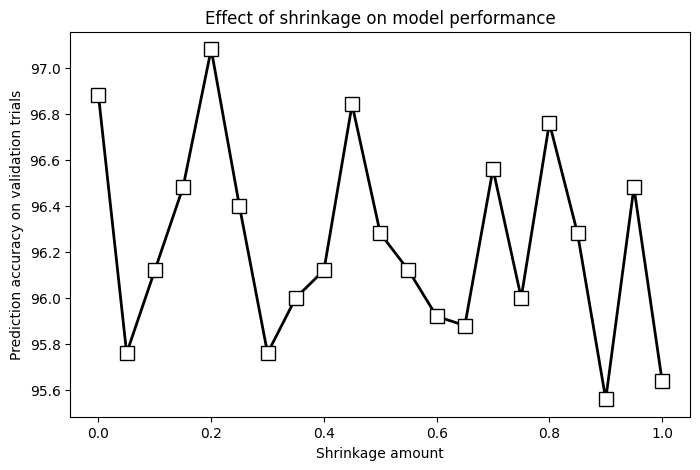

In [49]:
plt.figure(figsize=(8,5))
plt.plot(shrinkage,accuracies,'ks-',markersize=10,markerfacecolor='w',linewidth=2)
plt.xlabel('Shrinkage amount')
plt.ylabel('Prediction accuracy on validation trials')
plt.title('Effect of shrinkage on model performance')